In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif

%matplotlib inline

In [18]:
train = pd.read_csv("../data/train.csv",nrows=50000)
train.drop('ID_code',inplace=True,axis=1)
test = pd.read_csv("../data/test.csv",nrows=50000)
test.drop('ID_code',inplace=True,axis=1)

pred = pd.read_csv("../data/one_round_base_sub.csv",nrows=50000)
test['target'] = pred['target'].apply(lambda x: 1 if x>0.5 else 0)

In [3]:
def plotkde(data_1,data_0,label_1,label_0,features):
    sns.set_style('whitegrid')
    fig,ax = plt.subplots(25,8,figsize=(15,50))
    i = 0
    
    for feature in features:
        i += 1
        plt.subplot(25,8,i)
        sns.kdeplot(data_1[feature], bw=0.5,label=label_1)
        sns.kdeplot(data_0[feature], bw=0.5,label=label_0)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

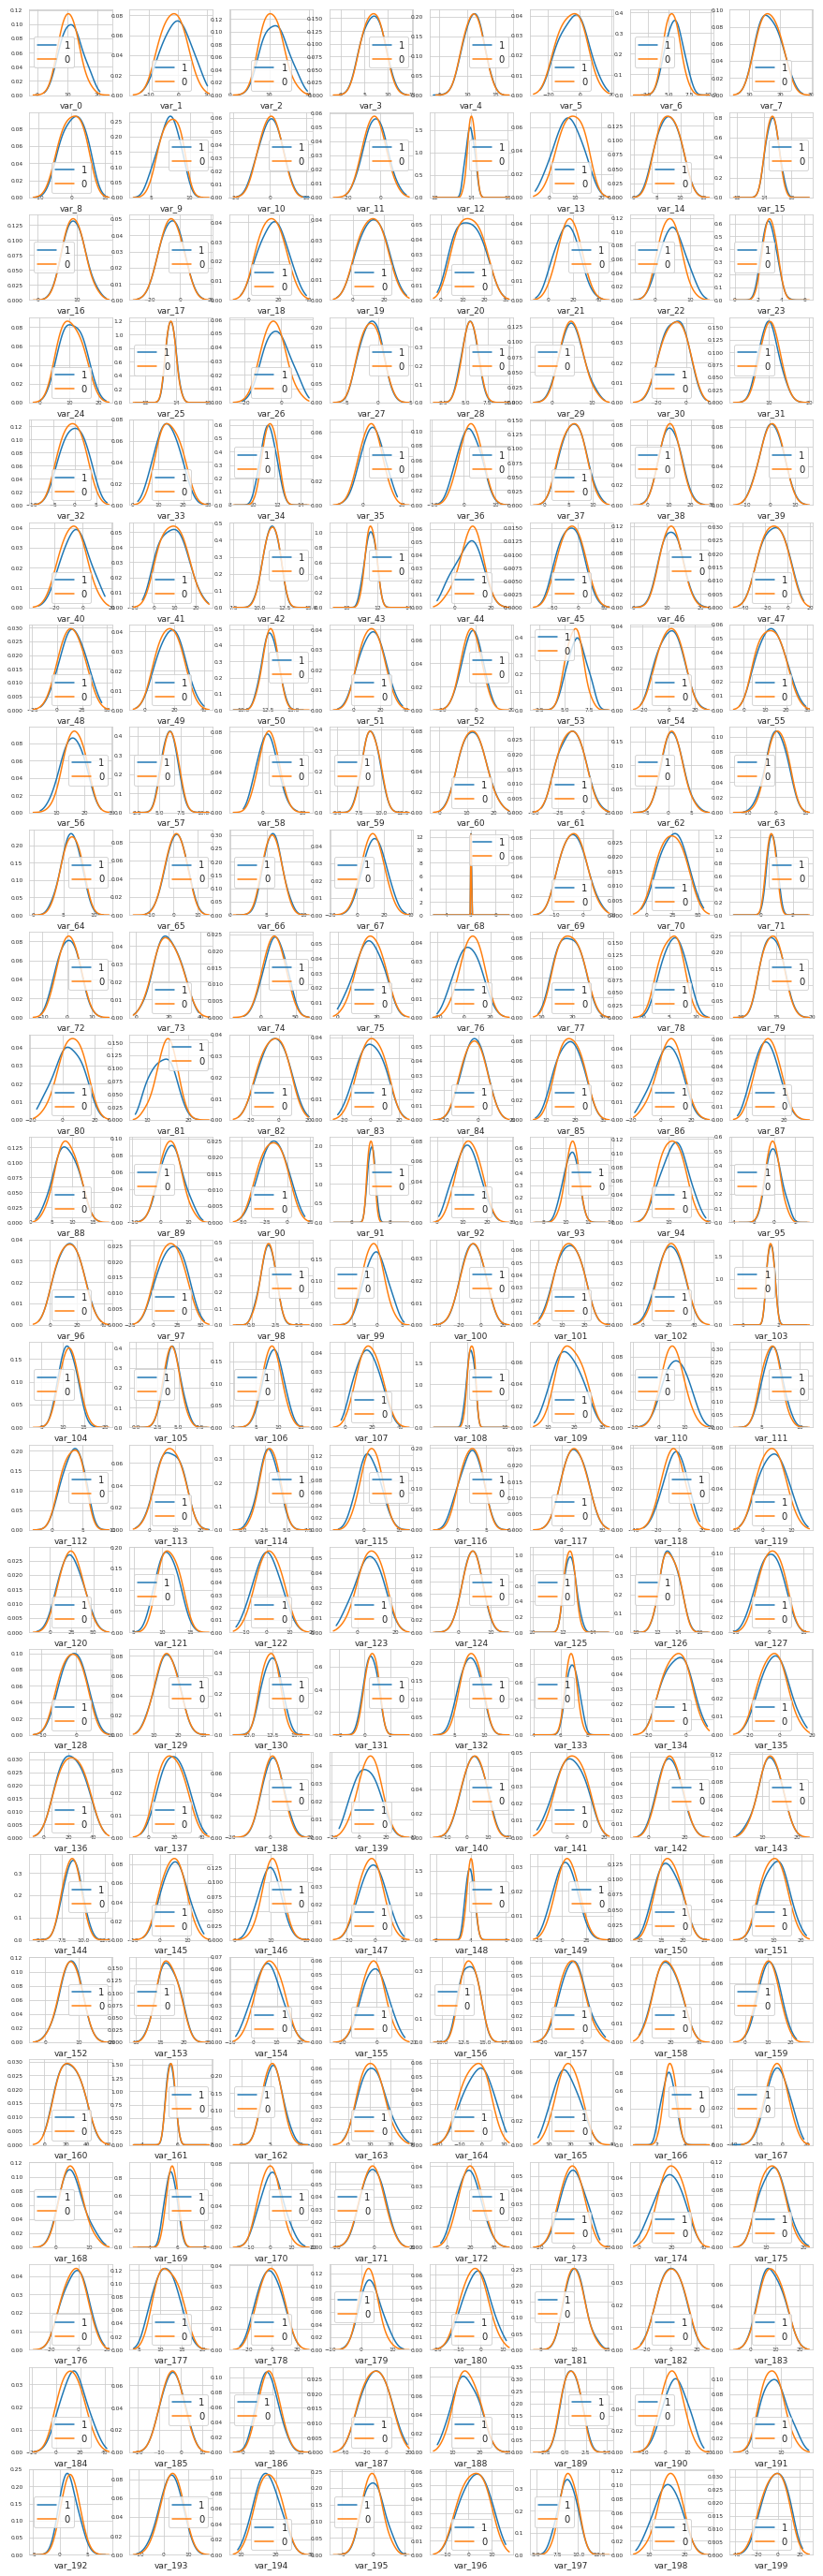

In [23]:
plotkde(test[test.target == 1],test[test.target == 0],'1','0',test.columns[:-1])

In [41]:
train_x = train.drop('target',axis=1)
train_y = train['target']

In [43]:
base_features = train_x.columns
f_len = len(base_features)
train_x['sum'] = train_x.sum(1)
train_x['max'] = train_x.max(1)
train_x['min'] = train_x.min(1)
train_x['std'] = train_x.std(1)

train_x['max_dif'] = train_x['max'] - train_x['min']

for f1_ind in range(f_len):
    for f2_ind in range(f1_ind+1,f_len):
        f1 = base_features[f1_ind]
        f2 = base_features[f2_ind]
        train_x[f1+'-'+f2] = train_x[f1] - train_x[f2]

train_x.drop(base_features,axis=1,inplace=True)

KeyboardInterrupt: 

In [36]:
#min_pca_x = PCA(n_components=2).fit_transform(min_max_scale_x)
pca_x = PCA(n_components=2).fit_transform(train_x)
#std_pca_x = PCA(n_components=2).fit_transform(std_scale_x)

In [25]:
def plotPCA(x,y):
    plt.scatter(x[:,0],x[:,1],c=y,cmap="copper_r")
    plt.axis('off')
    plt.colorbar()
    plt.show()

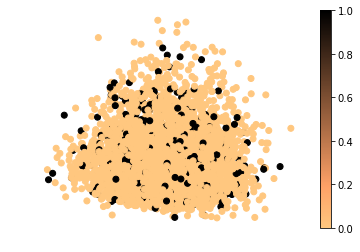

In [37]:
plotPCA(pca_x,train_y)

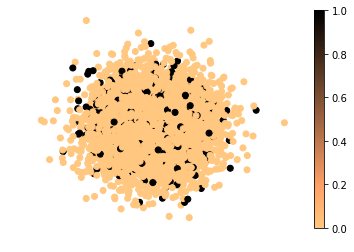

In [13]:
plotPCA(std_pca_x,train_y)

In [ ]:
p_values = f_classif(train_x,train_y)[1]
p_values

In [ ]:
features_list = train_x.columns
selected_var = features_list[p_values < 0.01]
selected_var

In [25]:
selected_train = train[selected_var]
selected_train['target'] = train['target']

selected_train.head()

/home/weiyi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_9,var_12,var_13,...,var_186,var_187,var_188,var_190,var_191,var_196,var_197,var_198,var_199,target
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,5.7470,14.0137,0.5745,...,11.8411,-19.7159,17.5743,4.4354,3.9642,7.8784,8.5635,12.7803,-1.0914,0
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,8.0851,14.0239,8.4135,...,7.6543,-15.9319,13.3175,7.6421,7.7214,8.1267,8.7889,18.3560,1.9518,0
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,5.9525,14.1929,7.3124,...,5.3745,-6.2660,10.1934,2.9057,9.7905,-6.5213,8.2675,14.7222,0.3965,0
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,8.2450,13.8463,11.9704,...,7.9336,-12.8279,12.4124,4.4666,4.7433,-2.9275,10.2922,17.9697,-8.9996,0
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,7.6784,13.8481,7.8895,...,6.4209,5.9270,16.0201,-1.4905,9.5214,3.9267,9.5031,17.9974,-8.8104,0


In [ ]:
train_x.head()